In [90]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

### 1. Import csv data from file

In [91]:
adult_df = pd.read_csv('adult.csv')

In [92]:
adult_df # Get glimpse of data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [93]:
adult_df.info() #Column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [94]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [95]:
adult_df['age'].value_counts() # Distinct values & their count for the age column

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [96]:
adult_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [97]:
# Here '?' is a missing value for workclass. Replace it with NaN, so that it can be considered as missing value
# and can be filled with appropriate value in next section(missing value analysis)

adult_df['workclass'] = adult_df['workclass'].replace('?', np.NaN)

In [98]:
adult_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [99]:
adult_df['fnlwgt'].value_counts()

123011    13
203488    13
164190    13
126675    12
121124    12
          ..
36376      1
78567      1
180407     1
210869     1
125489     1
Name: fnlwgt, Length: 21648, dtype: int64

In [100]:
adult_df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [101]:
# Here 'Some-college' is not an appropriate value for 'education column'.
# Replace it with NaN, so that it can be considered as missing value
# and can be filled with appropriate value in next section(missing value analysis)

adult_df['education'] = adult_df['education'].replace('Some-college', np.NaN)

In [102]:
adult_df['education'].value_counts()

HS-grad        10501
Bachelors       5355
Masters         1723
Assoc-voc       1382
11th            1175
Assoc-acdm      1067
10th             933
7th-8th          646
Prof-school      576
9th              514
12th             433
Doctorate        413
5th-6th          333
1st-4th          168
Preschool         51
Name: education, dtype: int64

In [103]:
adult_df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [104]:
adult_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,NaN,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,NaN,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,NaN,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [105]:
adult_df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [106]:
adult_df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [107]:
adult_df['occupation'] = adult_df['occupation'].replace('?', np.NaN)
adult_df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [108]:
adult_df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [109]:
adult_df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [110]:
adult_df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x206a325fb48>,
 'caps': [<matplotlib.lines.Line2D at 0x206a325fcc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x206a325f308>],
 'medians': [<matplotlib.lines.Line2D at 0x206a3258f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x206a3258cc8>],
 'means': []}

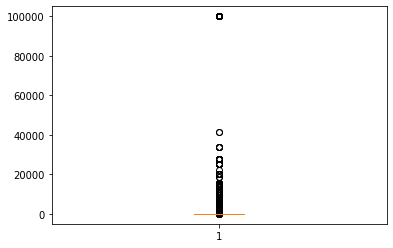

In [111]:
plt.ion()
plt.boxplot(adult_df['capital.gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x206a3bfaf08>,
 'caps': [<matplotlib.lines.Line2D at 0x206a3bfcfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x206a3bfa648>],
 'medians': [<matplotlib.lines.Line2D at 0x206a3c02f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x206a3c02ec8>],
 'means': []}

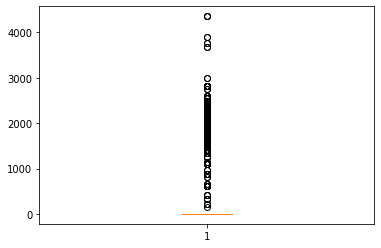

In [112]:
plt.ion()
plt.boxplot(adult_df['capital.loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x206a3c62a48>,
 'caps': [<matplotlib.lines.Line2D at 0x206a3c65a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x206a3c5bfc8>],
 'medians': [<matplotlib.lines.Line2D at 0x206a3c6b988>],
 'fliers': [<matplotlib.lines.Line2D at 0x206a3c6bfc8>],
 'means': []}

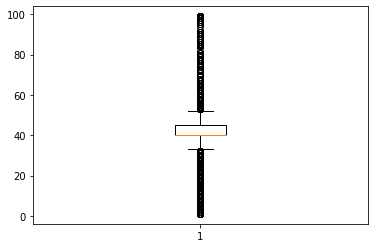

In [113]:
plt.ion()
plt.boxplot(adult_df['hours.per.week'])

In [114]:
adult_df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [115]:
adult_df['native.country'] = adult_df['native.country'].replace('?', np.NaN)
adult_df['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [116]:
adult_df['education'].value_counts()

HS-grad        10501
Bachelors       5355
Masters         1723
Assoc-voc       1382
11th            1175
Assoc-acdm      1067
10th             933
7th-8th          646
Prof-school      576
9th              514
12th             433
Doctorate        413
5th-6th          333
1st-4th          168
Preschool         51
Name: education, dtype: int64

In [117]:
adult_df.select_dtypes(exclude = [np.number]).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

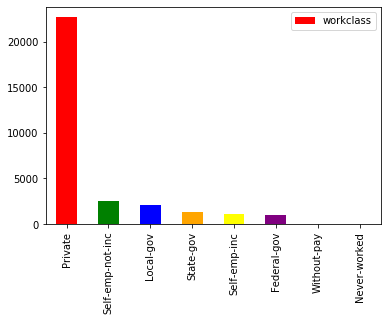

In [118]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["workclass"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

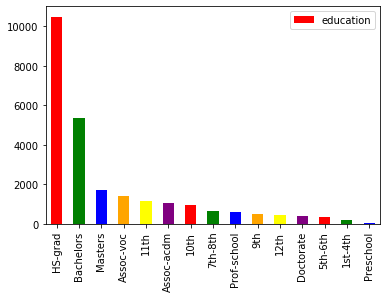

In [119]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["education"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

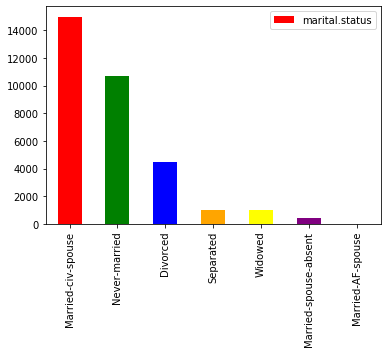

In [120]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["marital.status"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

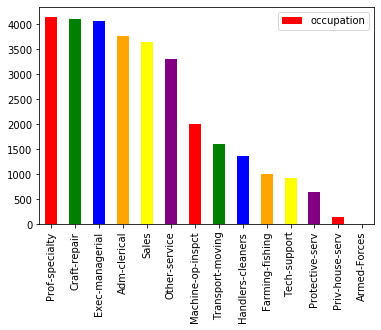

In [121]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["occupation"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

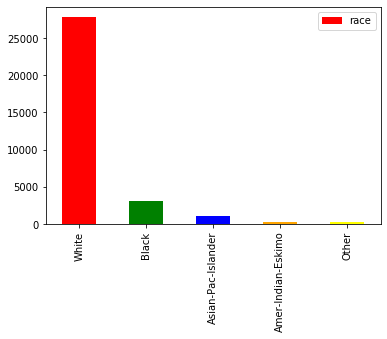

In [122]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["race"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

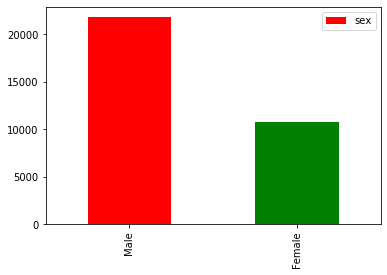

In [123]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["sex"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

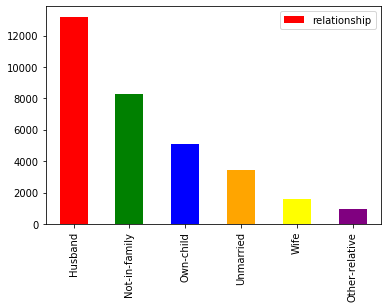

In [124]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["relationship"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

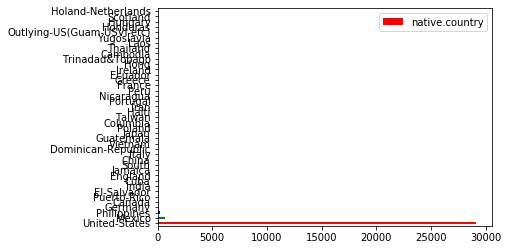

In [125]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["native.country"].value_counts().plot.barh(color = colors, legend = True);
plt.legend();

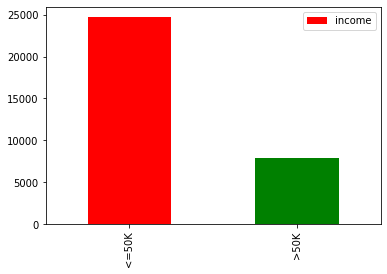

In [126]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
adult_df["income"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

In [127]:
adult_df["income"].value_counts() * 100 / len(adult_df)

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

In [128]:
# Education distribution based on gender
education_sex = adult_df.groupby(["education", "sex"])["sex"].count()
education_sex

education    sex   
10th         Female     295
             Male       638
11th         Female     432
             Male       743
12th         Female     144
             Male       289
1st-4th      Female      46
             Male       122
5th-6th      Female      84
             Male       249
7th-8th      Female     160
             Male       486
9th          Female     144
             Male       370
Assoc-acdm   Female     421
             Male       646
Assoc-voc    Female     500
             Male       882
Bachelors    Female    1619
             Male      3736
Doctorate    Female      86
             Male       327
HS-grad      Female    3390
             Male      7111
Masters      Female     536
             Male      1187
Preschool    Female      16
             Male        35
Prof-school  Female      92
             Male       484
Name: sex, dtype: int64

In [129]:
education_sex * 100 / education_sex.sum()

education    sex   
10th         Female     1.167392
             Male       2.524733
11th         Female     1.709537
             Male       2.940245
12th         Female     0.569846
             Male       1.143649
1st-4th      Female     0.182034
             Male       0.482786
5th-6th      Female     0.332410
             Male       0.985358
7th-8th      Female     0.633162
             Male       1.923229
9th          Female     0.569846
             Male       1.464187
Assoc-acdm   Female     1.666007
             Male       2.556391
Assoc-voc    Female     1.978631
             Male       3.490305
Bachelors    Female     6.406806
             Male      14.784329
Doctorate    Female     0.340324
             Male       1.294025
HS-grad      Female    13.415117
             Male      28.140087
Masters      Female     2.121092
             Male       4.697269
Preschool    Female     0.063316
             Male       0.138504
Prof-school  Female     0.364068
             Male      

In [130]:
adult_df.groupby(["education", "sex"])["age"].mean()

education    sex   
10th         Female    35.447458
             Male      38.346395
11th         Female    30.546296
             Male      33.407806
12th         Female    29.756944
             Male      33.117647
1st-4th      Female    48.521739
             Male      45.245902
5th-6th      Female    44.369048
             Male      42.385542
7th-8th      Female    49.693750
             Male      48.034979
9th          Female    42.131944
             Male      40.643243
Assoc-acdm   Female    36.361045
             Male      38.046440
Assoc-voc    Female    37.872000
             Male      38.939909
Bachelors    Female    35.635578
             Male      40.321734
Doctorate    Female    45.325581
             Male      48.327217
HS-grad      Female    38.678171
             Male      39.115736
Masters      Female    43.074627
             Male      44.490312
Preschool    Female    41.750000
             Male      43.228571
Prof-school  Female    40.195652
             Male      

Text(0.5, 1.0, 'Mean age')

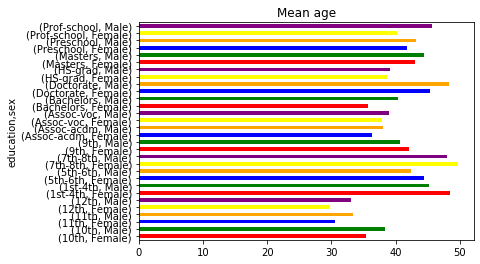

In [131]:
adult_df.groupby(["education", "sex"])["age"].mean().plot.barh(color = colors);
plt.title("Mean age")

### 2. Missing value analysis

In [132]:
adult_df.isna().sum() # count missing values

age                  0
workclass         1836
fnlwgt               0
education         7291
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [133]:
# Fill missing values
# 1. categorical attributes
categorical_columns = ['workclass', 'education', 'occupation', 'native.country']
for column in categorical_columns:
    adult_df[column].fillna(adult_df[column].mode()[0], inplace=True)
adult_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

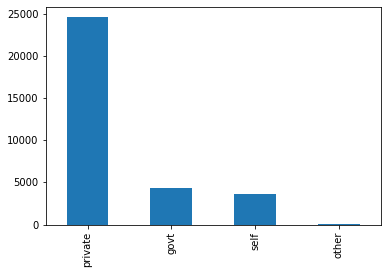

In [134]:
# %% [code]
adult_df['workclass'] = adult_df['workclass'].replace(['Federal-gov','State-gov','Local-gov'],'govt')
adult_df['workclass'] = adult_df['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'self')
adult_df['workclass'] = adult_df['workclass'].replace(['Without-pay','Never-worked'],'other')
adult_df['workclass'] = adult_df['workclass'].replace('Private','private')

# %% [code]
x_update = adult_df['workclass'].value_counts()
x_update.plot.bar()

In [135]:
adult_df['education'].value_counts()

HS-grad        17792
Bachelors       5355
Masters         1723
Assoc-voc       1382
11th            1175
Assoc-acdm      1067
10th             933
7th-8th          646
Prof-school      576
9th              514
12th             433
Doctorate        413
5th-6th          333
1st-4th          168
Preschool         51
Name: education, dtype: int64

In [141]:
# %% [code]
adult_df['education'] = adult_df['education'].replace(['HS-grad','11th','10th','7th-8th','9th','12th'],'intermediate')
adult_df['education'] = adult_df['education'].replace(['Some-college','Bachelors','Masters','Assoc-voc','Assoc-acdm','Prof-school','Doctorate'],'highly qualified')
adult_df['education'] = adult_df['education'].replace(['Preschool','1st-4th','5th-6th'],'least qualified')
adult_df['education'].value_counts()

intermediate        21493
highly qualified    10516
least qualified       552
Name: education, dtype: int64

In [142]:
adult_df['occupation'] = adult_df['occupation'].replace(['Exec-managerial','Adm-clerical','Sales'],'finance')
adult_df['occupation'] = adult_df['occupation'].replace(['Armed-Forces','Priv-house-serv','Protective-serv'],'defence')
adult_df['occupation'] = adult_df['occupation'].replace(['Transport-moving','Handlers-cleaners','Farming-fishing','Craft-repair'],'onfield')
adult_df['occupation'] = adult_df['occupation'].replace(['Tech-support','Machine-op-inspct'],'technical')
adult_df['occupation'].value_counts()

finance           11486
onfield            8060
Prof-specialty     5983
Other-service      3295
technical          2930
defence             807
Name: occupation, dtype: int64

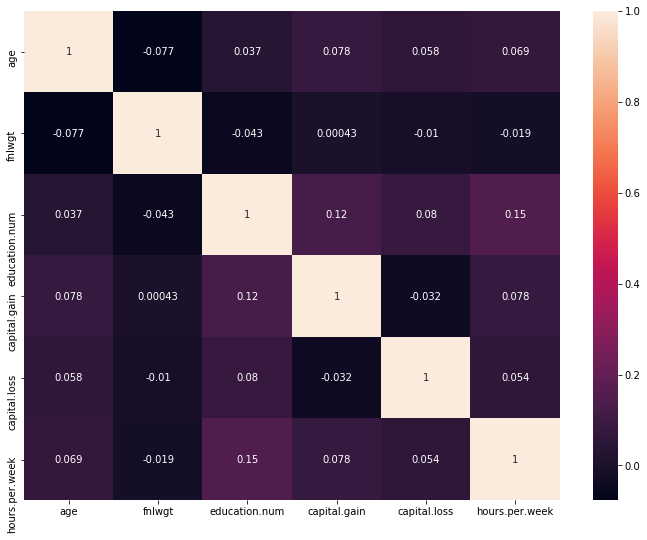

In [143]:
# %% [code]
correlation = adult_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(correlation,annot=True)

In [151]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
adult_df['workclass'] = le.fit_transform(adult_df['workclass'])
adult_df['marital.status'] = le.fit_transform(adult_df['marital.status'])
adult_df['occupation'] = le.fit_transform(adult_df['occupation'])
adult_df['relationship'] = le.fit_transform(adult_df['relationship'])
adult_df['race'] = le.fit_transform(adult_df['race'])
adult_df['sex'] = le.fit_transform(adult_df['sex'])
adult_df['native.country'] = le.fit_transform(adult_df['native.country'])
adult_df['income'] = le.fit_transform(adult_df['income'])
adult_df['education'] = le.fit_transform(adult_df['education'])

adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,2,77053,1,9,6,1,1,4,0,0,4356,40,38,0
1,82,2,132870,1,9,6,3,1,4,0,0,4356,18,38,0
2,66,2,186061,1,10,6,1,4,2,0,0,4356,40,38,0
3,54,2,140359,1,4,0,5,4,4,0,0,3900,40,38,0
4,41,2,264663,1,10,5,1,3,4,0,0,3900,40,38,0


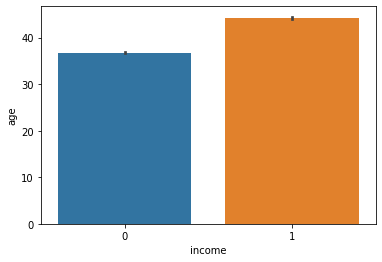

In [152]:
import seaborn as sns
sns.barplot(x = 'income', y = 'age', data = adult_df)

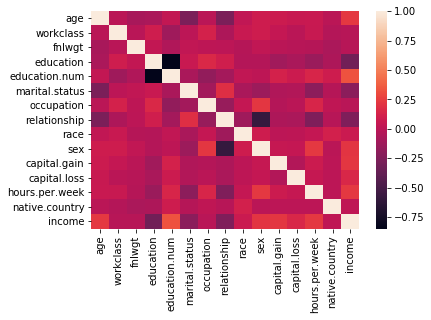

In [153]:
sns.heatmap(adult_df.corr())

In [154]:
X = adult_df.drop(['income'], axis = 1)
Y = adult_df['income']

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2) 

In [156]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [157]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [158]:
Y_pred = gb.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred)*100)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4947
           1       0.65      0.31      0.41      1566

    accuracy                           0.79      6513
   macro avg       0.73      0.63      0.64      6513
weighted avg       0.77      0.79      0.76      6513

[[4684  263]
 [1088  478]]
79.25687087363734


In [159]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != Y_pred).sum()))

Number of mislabeled points out of a total 6513 points : 1351


In [162]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [163]:
Y_pred = mnb.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred)*100)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4947
           1       0.62      0.23      0.34      1566

    accuracy                           0.78      6513
   macro avg       0.71      0.59      0.60      6513
weighted avg       0.75      0.78      0.74      6513

[[4722  225]
 [1205  361]]
78.0439121756487


In [164]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != Y_pred).sum()))

Number of mislabeled points out of a total 6513 points : 1430


In [ ]:
#To Do - Plot the decision boundary, visualize training and test results (1 point)